In [940]:
#!/usr/bin/env python3
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sys
from scipy.special import stdtrit

# Import the data
if sys.platform == 'darwin':
    df = pd.read_csv("/Users/aymericvie/Documents/GitHub/evology/evology/code/rundata/run_data.csv")
if sys.platform == 'win32':
    df = pd.read_csv("D:/OneDrive/Research/2021_Market_Ecology/evology/evology/code/rundata/run_data.csv")

In [941]:

print("Avg significance, avg number of deviations, avg percentage of stat. signif. comparison")
print(df['AvgSignificance'].mean())
print(df["AvgNumberDev"].mean())
print(df["PerSignif"].mean())


Avg significance, avg number of deviations, avg percentage of stat. signif. comparison
1.1507622908826765
0.0
0.0


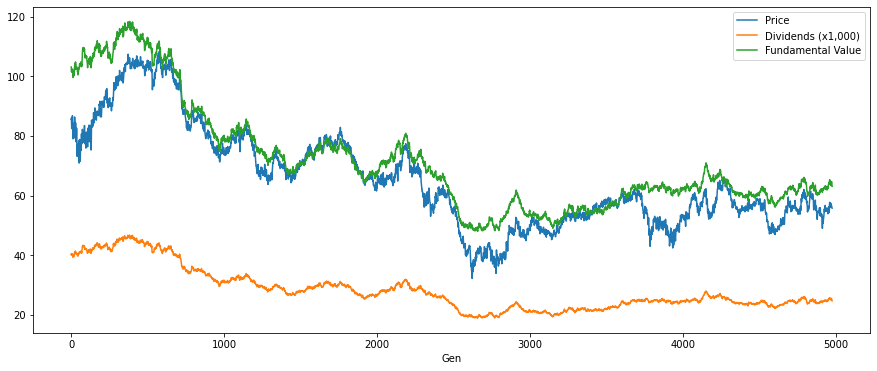

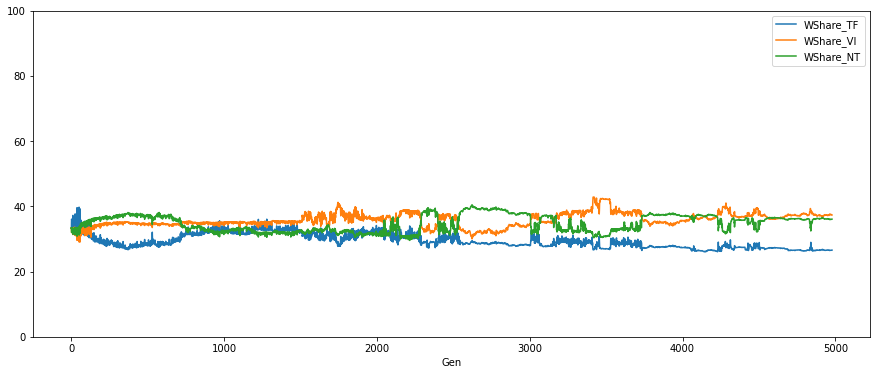

In [942]:
df['Fundamental Value'] = df['Mean_VI']
df['Dividends (x1,000)'] = 10000 * df['Dividends']
df.plot(x="Gen", y = ['Price', 'Dividends (x1,000)', 'Fundamental Value'],
        kind="line", figsize=(15, 6))
plt.show()

df.plot(x="Gen", y = ["WShare_TF", "WShare_VI", "WShare_NT"],
        kind="line", figsize=(15, 6), ylim=(0,100))
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/share_evo.png', dpi = 300)
plt.show()

Annual Sharpe ratios 
0.9576916825489742 1.2139907305239097 1.3203719909532847
Annual mean returns  
[0.10826295255571117, 0.11174003187752703, 0.09340292420865534]
Annual std returns
[0.11304572706276464, 0.09204356266320461, 0.07073985577444741]
Exponent of time required to detect, NTvsTF
[0.017115715477033666, 0.019388580947253892, 11.278745351859293, 0.025812435544057568]
2.476754166596619


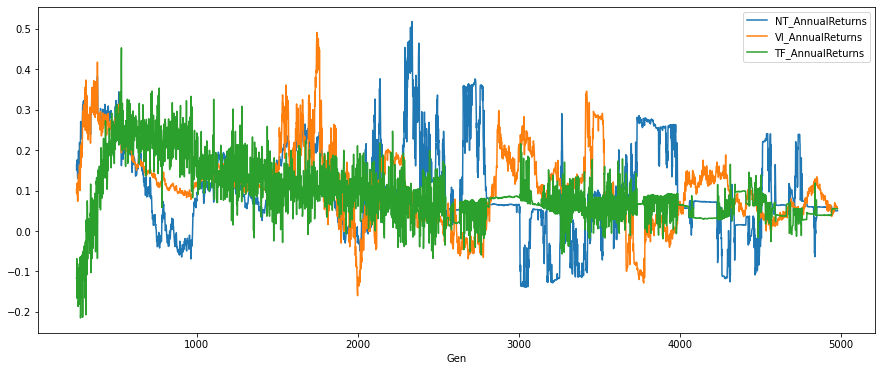

In [943]:
""" Sharpe ratios based on annual returns """

SharpeNT = np.nanmean(df['NT_AnnualReturns']) / np.nanstd(df['NT_AnnualReturns'])
SharpeVI = np.nanmean(df['VI_AnnualReturns']) / np.nanstd(df['VI_AnnualReturns'])
SharpeTF = np.nanmean(df['TF_AnnualReturns']) / np.nanstd(df['TF_AnnualReturns'])

print('Annual Sharpe ratios ')
print(SharpeNT, SharpeVI, SharpeTF)
print('Annual mean returns  ')
print([np.nanmean(df['NT_AnnualReturns']), np.nanmean(df['VI_AnnualReturns']), np.nanmean(df['TF_AnnualReturns'])])
print('Annual std returns')
print([np.nanstd(df['NT_AnnualReturns']), np.nanstd(df['VI_AnnualReturns']), np.nanstd(df['TF_AnnualReturns'])])



print("Exponent of time required to detect, NTvsTF")
T = len(df['Gen'])
SENT = np.sqrt((1 + 0.5 * SharpeNT ** 2)/T)
SETF = np.sqrt((1 + 0.5 * SharpeTF ** 2)/T)
Pooled = (SENT + SETF) / np.sqrt(2)

if SharpeNT < SharpeTF:
        DS = SharpeTF - SharpeNT
        boundTF = SharpeTF - 1.96 * SETF
        boundNT = SharpeNT + 1.96 * SENT
        S = (abs(boundTF - boundNT)) / Pooled
else:
        DS = SharpeNT - SharpeTF
        boundTF = SharpeTF + 1.96 * SETF
        boundNT = SharpeNT - 1.96 * SENT
        S = (abs(boundNT - boundTF)) / Pooled

print([SENT, SETF, S, Pooled])
k = np.log(T) / np.log(S / DS)
print(k)

df.plot(x="Gen", y = ["NT_AnnualReturns", "VI_AnnualReturns", "TF_AnnualReturns"],
        kind="line", figsize=(15, 6))
plt.show()



[2.860116166239831, 2.9770992049059988, 3.9699565878339116]
[1.5557113455521794, 1.9056990927967334, 1.3631247425213153]


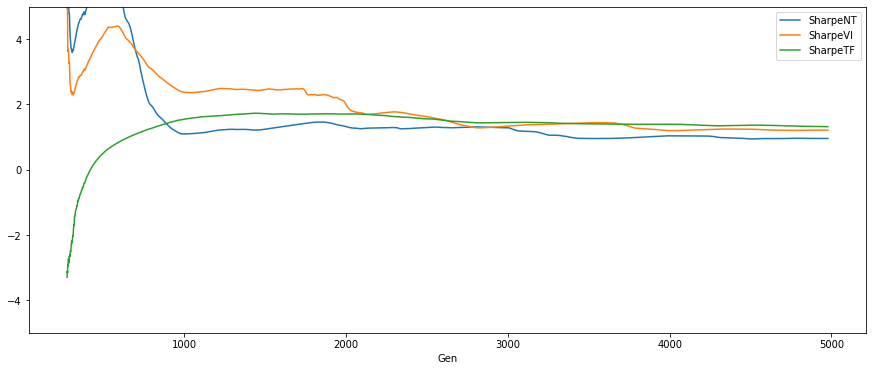

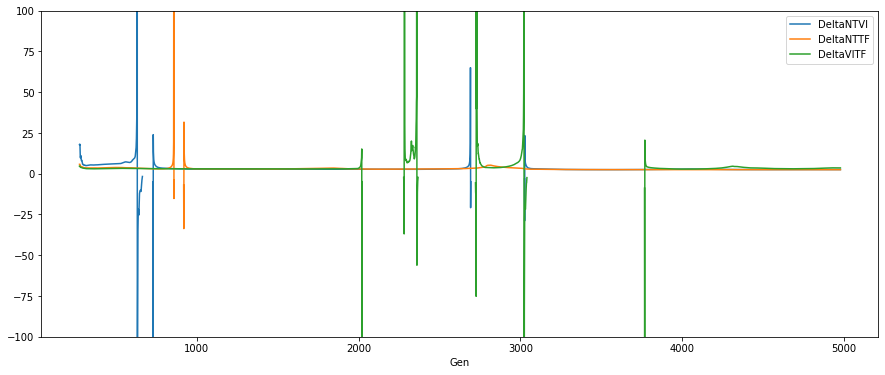

In [944]:
print([df['DeltaNTVI'].mean(),df['DeltaNTTF'].mean(),df['DeltaVITF'].mean()])
print([df['SharpeNT'].mean(),df['SharpeVI'].mean(),df['SharpeTF'].mean()])

df.plot(x="Gen", y = ["SharpeNT", "SharpeVI", "SharpeTF"],
        kind="line", figsize=(15, 6))
plt.ylim(-5,5)
plt.show()


df.plot(x="Gen", y = ["DeltaNTVI", "DeltaNTTF", "DeltaVITF"],
        kind="line", figsize=(15, 6))
plt.ylim(-100,100)
plt.show()

In [945]:

if df['Rep'].sum() != 0:
        df.plot(x="Gen", y = ['Rep'],
                kind="line", figsize=(15, 6))
        plt.show()

In [946]:
if df['Rep'].sum() != 0:
        df['Rep10'] = 2 * df['Rep']
        df.plot(x="Gen", y = ['Rep10','WShare_TF'],
                kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['Rep10','WShare_VI'],
        kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['Rep10','WShare_NT'],
        kind="line", figsize=(15, 6))
        plt.show()

In [947]:
if df['CountSelected'].sum() != 0 or df['CountMutated'].sum() != 0 or df['CountCrossed'].sum() != 0:

        df.plot(x="Gen", y = ["CountSelected", 'CountMutated', 'CountCrossed'],
                kind="line", figsize=(15, 6))
        plt.show()
        print('Strategy outflows')
        df.plot(x="Gen", y = ["FromNT", 'FromVI', 'FromTF'],
                kind="line", figsize=(15, 6))
        plt.show()
        print('Strategy inflows')
        df.plot(x="Gen", y = ["TowardsNT", 'TowardsVI', 'TowardsTF'],
                kind="line", figsize=(15, 6))
        plt.show()

In [948]:
if df['Spoils'].sum() != 0:
        df.plot(x="Gen", y = ['Spoils'],
                kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['PerSpoils'],
                kind="line", figsize=(15, 6))
        plt.show()

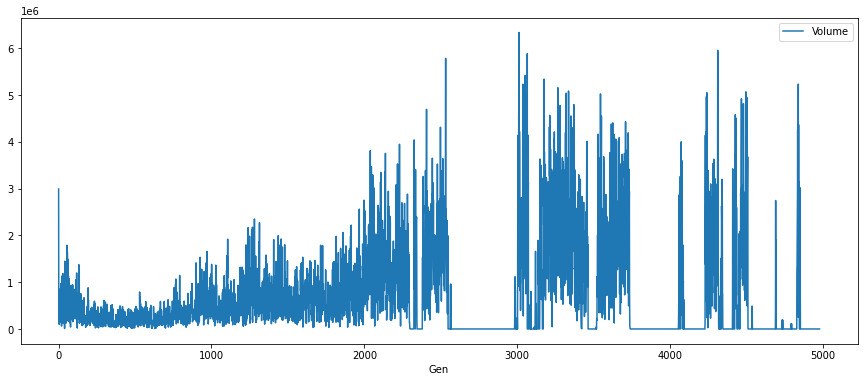

0       2.991044e+06
1       3.130270e+05
2       3.170891e+05
3       7.968790e+05
4       9.926038e+04
            ...     
4974    0.000000e+00
4975    0.000000e+00
4976    0.000000e+00
4977    0.000000e+00
4978    0.000000e+00
Name: Volume, Length: 4979, dtype: float64


In [949]:
df.plot(x="Gen", y = ['Volume'],
        kind="line", figsize=(15, 6))
plt.show()

print(df['Volume'])

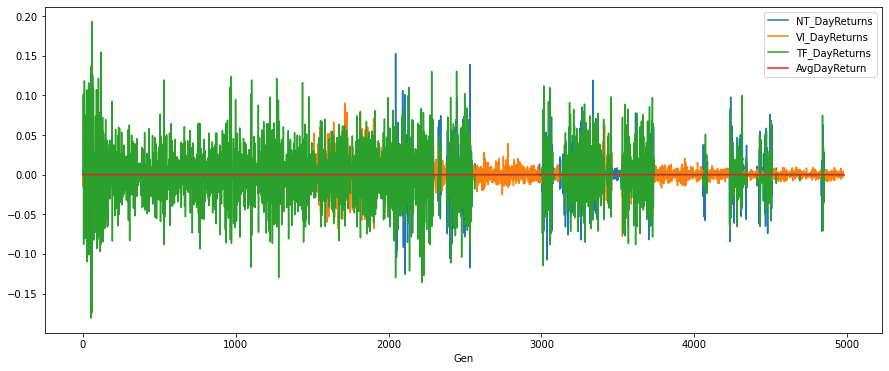

In [950]:
df.plot(x="Gen", y = ["NT_DayReturns", "VI_DayReturns", "TF_DayReturns", 'AvgDayReturn'],
        kind="line", figsize=(15, 6))
plt.show()

1.1507622908826765


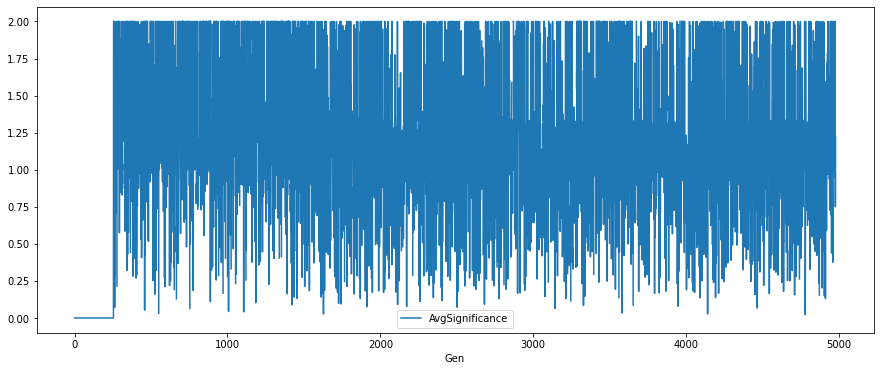

In [951]:
if df['AvgSignificance'].sum() != 0:

        print(df['AvgSignificance'].mean())

        df.plot(x="Gen", y = ["AvgSignificance"],
                kind="line", figsize=(15, 6))
        plt.show()


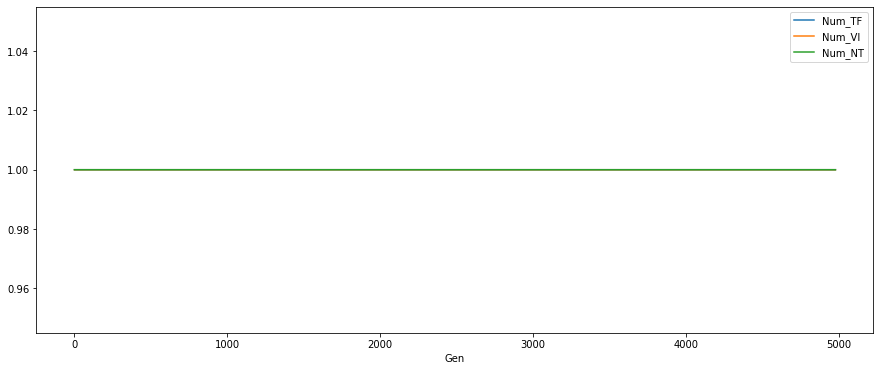

In [952]:
# Basic plots

df.plot(x="Gen", y = ["Num_TF", "Num_VI", "Num_NT"],
        kind="line", figsize=(15, 6))
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/num_evo.png', dpi = 300)
plt.show()

Average wealth per fund in the strategy


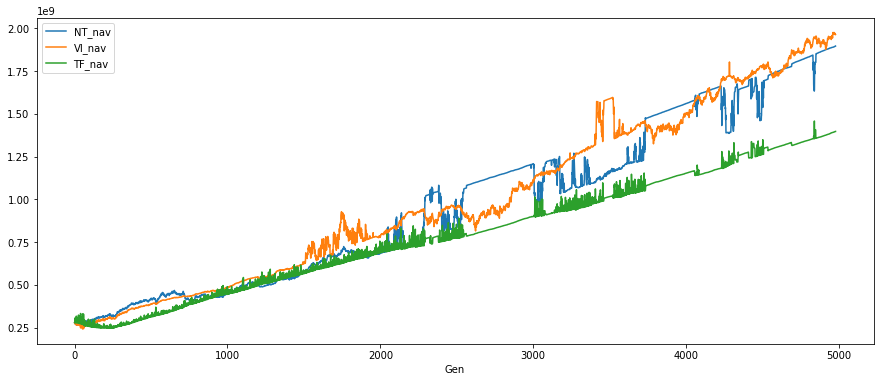

In [953]:
''' NAV '''
print('Average wealth per fund in the strategy')
df.plot(x="Gen", y = ["NT_nav", "VI_nav", "TF_nav"],
        kind="line", figsize=(15, 6))
plt.show()


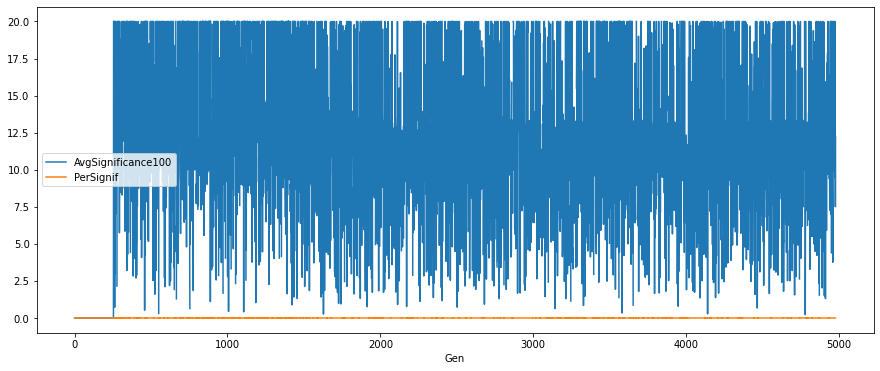

In [954]:
if df['AvgSignificance'].sum() != 0:
        df['AvgSignificance100'] = 10 * df["AvgSignificance"]

        df.plot(x="Gen", y = ["AvgSignificance100", "PerSignif"],
                kind="line", figsize=(15, 6))
        plt.show()

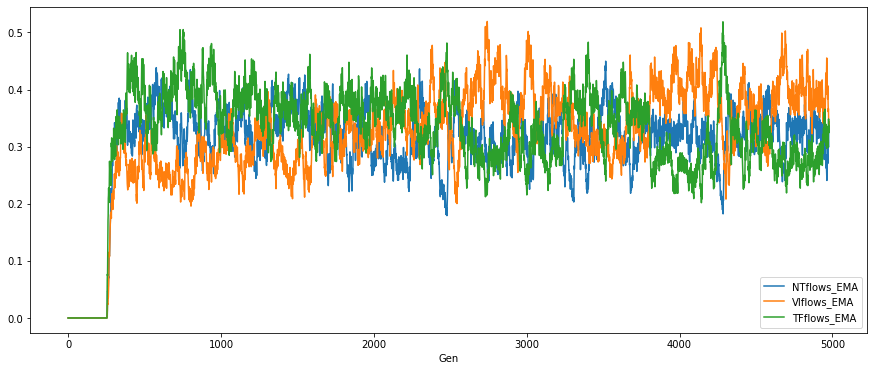

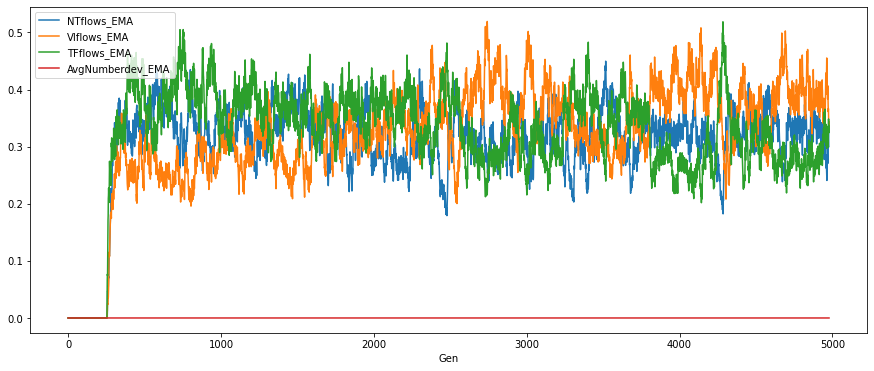

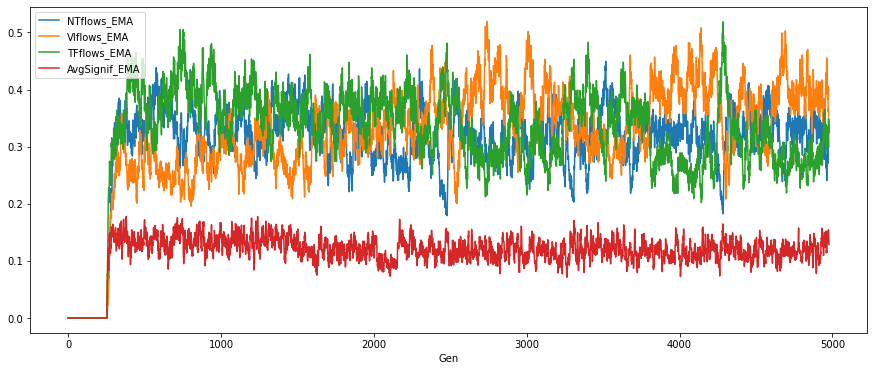

In [955]:
# df.plot(x="Gen", y = ["NTflows", "VIflows", "TFflows"],
#         kind="line", figsize=(15, 6))
# plt.show()

span = 252/5

df['NTflows_EMA'] = pd.Series.ewm(df['NTflows'], span=span).mean()
df['VIflows_EMA'] = pd.Series.ewm(df['VIflows'], span=span).mean()
df['TFflows_EMA'] = pd.Series.ewm(df['TFflows'], span=span).mean()

df.plot(x="Gen", y = ["NTflows_EMA", "VIflows_EMA", "TFflows_EMA"],
        kind="line", figsize=(15, 6))
plt.show()



df['AvgNumberdev_EMA'] = pd.Series.ewm(df['AvgNumberDev'], span=span/5).mean() / 30

df.plot(x="Gen", y = ["NTflows_EMA", "VIflows_EMA", "TFflows_EMA", "AvgNumberdev_EMA"],
        kind="line", figsize=(15, 6))
plt.show()

df['AvgSignif_EMA'] = pd.Series.ewm(df['AvgSignificance'], span=span/5).mean() / 10

df.plot(x="Gen", y = ["NTflows_EMA", "VIflows_EMA", "TFflows_EMA", "AvgSignif_EMA"],
        kind="line", figsize=(15, 6))
plt.show()

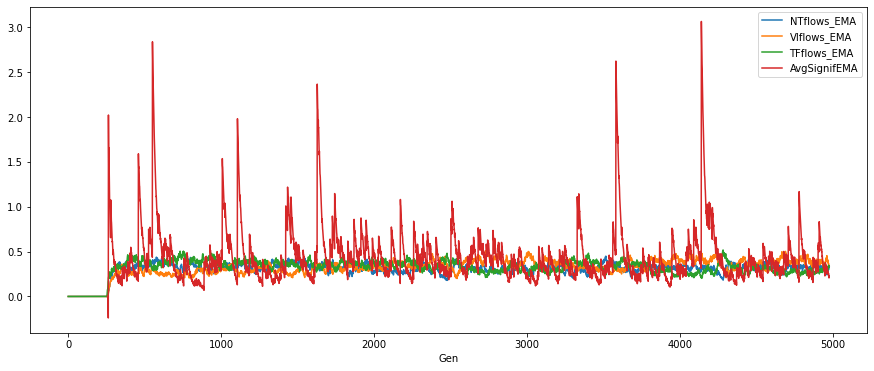

In [956]:
df['AvgSignifEMA'] = pd.Series.ewm(df['AvgSignificance'].pct_change(), span=span).mean() 
# df['AvgSignifEMA'] = df['AvgSignificance'].pct_change(periods=21) / 1000


df.plot(x="Gen", y = ["NTflows_EMA", "VIflows_EMA", "TFflows_EMA", "AvgSignifEMA"],
        kind="line", figsize=(15, 6))
plt.show()

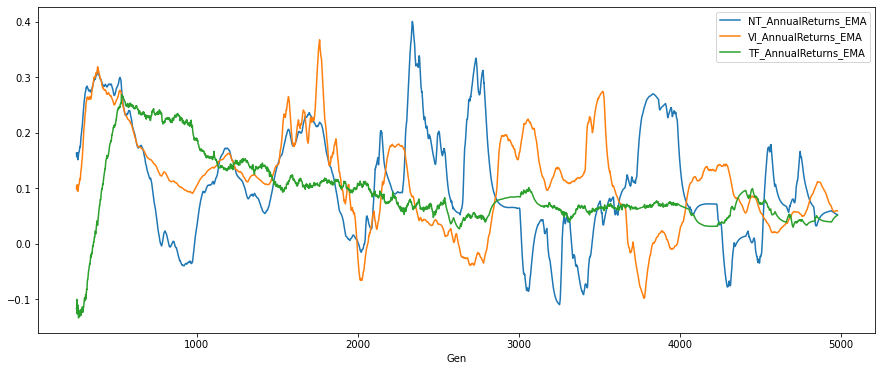

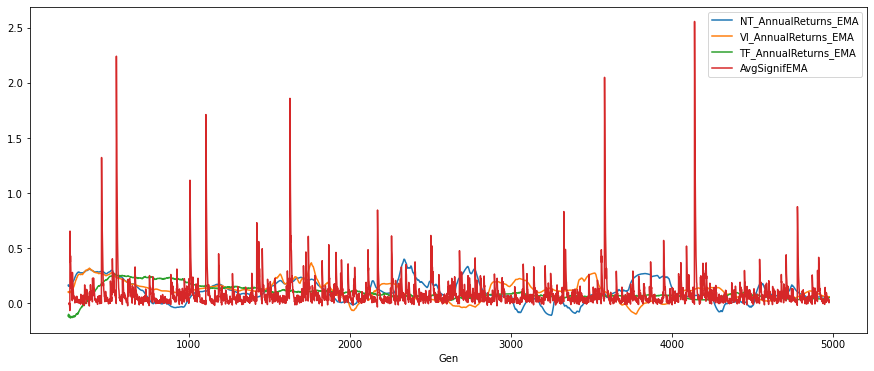

In [957]:

df['NT_AnnualReturns_EMA'] = pd.Series.ewm(df['NT_AnnualReturns'], span=span).mean()
df['VI_AnnualReturns_EMA'] = pd.Series.ewm(df['VI_AnnualReturns'], span=span).mean()
df['TF_AnnualReturns_EMA'] = pd.Series.ewm(df['TF_AnnualReturns'], span=span).mean()

df.plot(x="Gen", y = ["NT_AnnualReturns_EMA", "VI_AnnualReturns_EMA", "TF_AnnualReturns_EMA"],
        kind="line", figsize=(15, 6))
plt.show()

df['AvgSignifEMA'] = df['AvgSignificance'].pct_change(periods=252) / 10000

df['AvgSignifEMA'] = pd.Series.ewm(df['AvgSignificance'].pct_change(), span=span/5).mean()  / 5

df.plot(x="Gen", y = ["NT_AnnualReturns_EMA", "VI_AnnualReturns_EMA", "TF_AnnualReturns_EMA", "AvgSignifEMA"],
        kind="line", figsize=(15, 6))
plt.show()

In [958]:
data = pd.DataFrame()
# data['NT_AnnualReturns_EMA'] = df['NT_AnnualReturns_EMA']
# data['VI_AnnualReturns_EMA'] = df['VI_AnnualReturns_EMA']
# data['TF_AnnualReturns_EMA'] = df['TF_AnnualReturns_EMA']
data['NTflows_EMA'] = df['NTflows_EMA']
data['VIflows_EMA'] = df['VIflows_EMA']
data['TFflows_EMA'] = df['TFflows_EMA']
data['AvgSignificance'] = df['AvgSignificance']
data['PerSignif'] = df['PerSignif']
print(data.corr())

# # data = pd.DataFrame()
# data['NTflows'] = df['NTflows']
# data['VIflows'] = df['VIflows']
# data['TFflows'] = df['TFflows']
# data['NT_AnnualReturns'] = df['NT_AnnualReturns']
# data['VI_AnnualReturns'] = df['VI_AnnualReturns']
# data['TF_AnnualReturns'] = df['TF_AnnualReturns']
# data.corr()

# ''' Chances of moving in the same direction '''
Total = len(df['NTflows'])


def getjoint(x, y):
    N = len(x)
    serie = []
    for i in range(N):
        if x.loc[i] > 0 and y.loc[i] > 0:
            serie.append(1)
        if x.loc[i] < 0 and y.loc[i] < 0:
            serie.append(-1)
    return serie



ChanceNTVI = 100 * len(getjoint(data['NTflows_EMA'].pct_change(), data['VIflows_EMA'].pct_change())) / Total
print(ChanceNTVI)

ChanceTFVI = 100 * len(getjoint(data['TFflows_EMA'].pct_change(), data['VIflows_EMA'].pct_change())) / Total
print(ChanceTFVI)

ChanceNTTF = 100 * len(getjoint(data['NTflows_EMA'].pct_change(), data['TFflows_EMA'].pct_change())) / Total
print(ChanceNTTF)

ChanceNTSig = 100 * len(getjoint(data['NTflows_EMA'].pct_change(), data['AvgSignificance'].pct_change())) / Total
print(ChanceNTSig)

ChanceVISig = 100 * len(getjoint(data['VIflows_EMA'].pct_change(), data['AvgSignificance'].pct_change())) / Total
print(ChanceVISig)

ChanceTFSig = 100 * len(getjoint(data['TFflows_EMA'].pct_change(), data['AvgSignificance'].pct_change())) / Total
print(ChanceTFSig)




                 NTflows_EMA  VIflows_EMA  TFflows_EMA  AvgSignificance  \
NTflows_EMA         1.000000     0.557411     0.634285         0.420349   
VIflows_EMA         0.557411     1.000000     0.368366         0.324261   
TFflows_EMA         0.634285     0.368366     1.000000         0.436350   
AvgSignificance     0.420349     0.324261     0.436350         1.000000   
PerSignif                NaN          NaN          NaN              NaN   

                 PerSignif  
NTflows_EMA            NaN  
VIflows_EMA            NaN  
TFflows_EMA            NaN  
AvgSignificance        NaN  
PerSignif              NaN  
40.30929905603535
25.928901385820446
29.16248242619
43.62321751355694
42.19722835910825
46.27435227957421


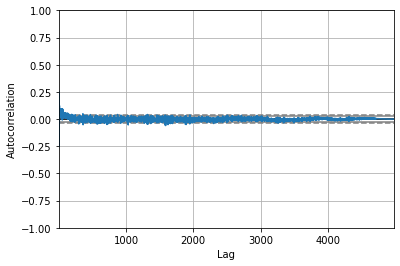

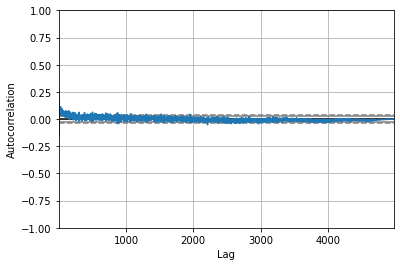

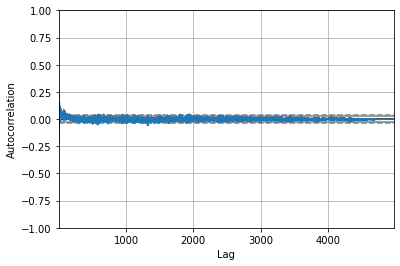

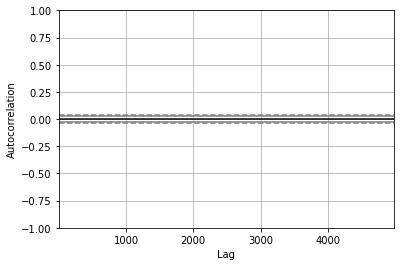

In [959]:
''' there is periodicity in flows EMA '''

x = pd.plotting.autocorrelation_plot(df['TFflows'])
x.plot()
plt.show()

x = pd.plotting.autocorrelation_plot(df['VIflows'])
x.plot()
plt.show()

x = pd.plotting.autocorrelation_plot(df['NTflows'])
x.plot()
plt.show()

x = pd.plotting.autocorrelation_plot(df['AvgSignificance'])
x.plot()
plt.show()



In [960]:
from scipy.signal import periodogram


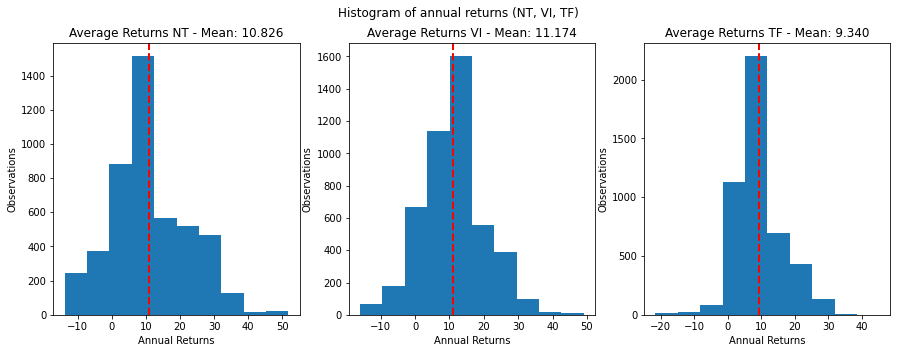

In [961]:
''' Histogram of the annual strategy returns '''

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5), sharex = False)
fig.suptitle('Histogram of annual returns (NT, VI, TF)')

ax1.hist(100 * df['NT_AnnualReturns'])
num = 100 * df['NT_AnnualReturns'].mean()
ax1.set_title('Average Returns NT - Mean: %1.3f' % num)
ax1.axvline(x=num, color='r', linestyle='dashed', linewidth=2)

ax2.hist(100 * df['VI_AnnualReturns'])
num = 100 * df['VI_AnnualReturns'].mean()
ax2.set_title('Average Returns VI - Mean: %1.3f' % num)
ax2.axvline(x=num, color='r', linestyle='dashed', linewidth=2)

ax3.hist(100 * df['TF_AnnualReturns'])
num = 100 * df['TF_AnnualReturns'].mean()
ax3.set_title('Average Returns TF - Mean: %1.3f' % num)
ax3.axvline(x=num, color='r', linestyle='dashed', linewidth=2)

ax1.set_ylabel('Observations')
ax1.set_xlabel('Annual Returns')
ax2.set_ylabel('Observations')
ax2.set_xlabel('Annual Returns')
ax3.set_ylabel('Observations')
ax3.set_xlabel('Annual Returns')
plt.show()

In [962]:
''' Price autocorrelation '''

print((df['Price'].pct_change()).autocorr(lag=1))

0.3842424677753128
